### <center>Clustering</center>

1. import data and packages
2. hierarchy clustering
    - cluster, present
3. k-means clustering
    - determine, cluster, present

In [6]:
# 1. import package and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing #机器学习

from sklearn import cluster
from sklearn.cluster import KMeans

from scipy.cluster import hierarchy #数学运算

coffee = pd.read_csv('coffee_data.csv') 
df = coffee[['A1','A2','A3','A4','A5']]
df_sc = pd.DataFrame(preprocessing.scale(df),columns=df.columns)
df_sc.head(5)

,A1,A2,A3,A4,A5
0,0.549058,1.955596,0.858584,0.268495,-0.962253
1,-0.581119,-0.307364,0.858584,0.523001,-0.160289
2,-0.976681,-0.307364,0.858584,0.586627,-0.816441
3,-0.129049,-1.044142,0.180893,0.141242,0.641674
4,0.266513,1.745088,-0.373582,0.523001,-1.472593


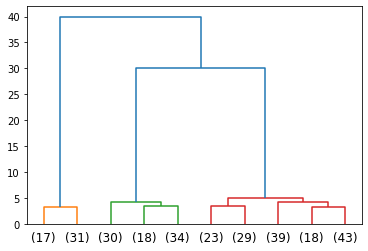

In [21]:
# 2. hierarchy clustering

# 2.1 clustering
linkages = hierarchy.linkage(df_sc,method='ward')
labels_hc = hierarchy.fcluster(linkages,t=3,criterion='maxclust') 
#can also use criterion = 'distance' 

#2.2 presenting
counts = list(zip(*np.unique(labels_hc,return_counts=True)))
average_within_cluster = pd.pivot_table(df_sc,index=labels_hc)
counts_by_choice = pd.crosstab(columns=labels_hc,index=coffee.PrefBev,
                       margins=True,colnames=['Cluster'],
                       rownames=['Coffee Type'])

hierarchy.dendrogram(linkages,orientation='top',truncate_mode='lastp',p=10)
plt.show()

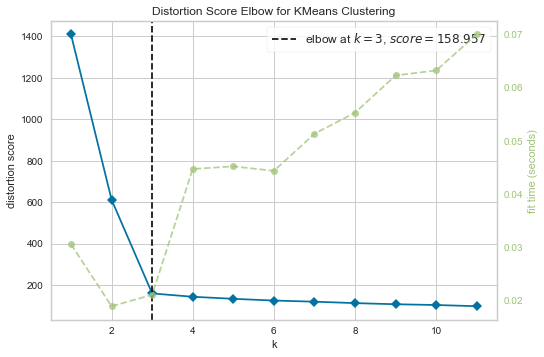

In [35]:
# 3. K-means clustering

# 3.1 determine
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(KMeans(), k=(1,12)).fit(df_sc)
visualizer.show()

In [ ]:
# 3.2 cluster
centroids_km, labels_km, inertia_km = cluster.k_means(df_sc,n_clusters=3,random_state=9650)

# 3.3 present
average_within_cluster = pd.pivot_table(df_sc,index=labels_km)
crosstab2 = pd.crosstab(columns=labels_km,index=coffee.PrefBev,margins=True,colnames=['Cluster'],rownames=['Coffee Type'])
